*Import libraries and Dataset*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*Importing Dataset*

In [ ]:
*Here, the dataset used is taken from kaggle*

In [2]:
diabetes_dataset = pd.read_csv("diabetes.csv")
# Preview data
diabetes_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


*Dataset Description*

In [3]:
# Dataset dimensions - (rows, columns)
diabetes_dataset.shape

(768, 9)

In [4]:
# Features data-type
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Statisticdal summary
diabetes_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
diabetes_dataset["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

*Data Visualization*

*Using Seaborn*
To check whether the dataset is balanced or imblanced
Here, the dataset is imbalanced as the number of patient with no diabetes are more than non-diabetics

<AxesSubplot: xlabel='Outcome', ylabel='count'>

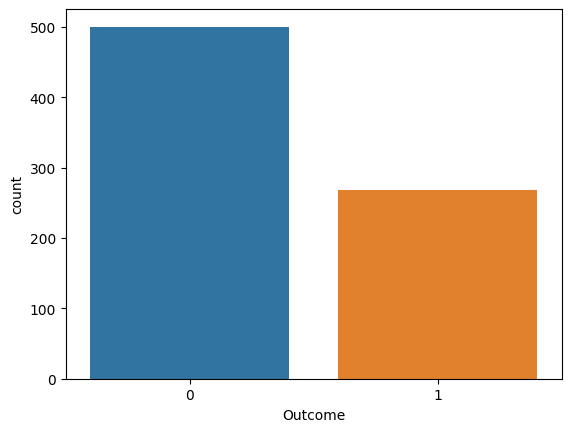

In [8]:
# Outcome countplot
sns.countplot(x="Outcome", data=diabetes_dataset)

<Figure size 1200x800 with 0 Axes>

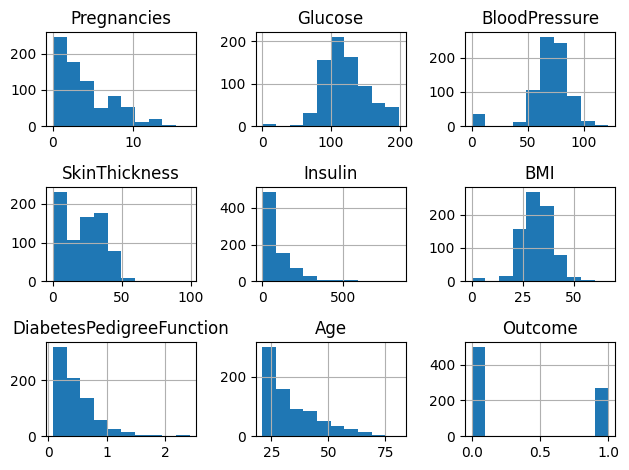

In [9]:
# Histogram of each feature
plt.figure(figsize=(12, 8))
diabetes_dataset.hist()
plt.tight_layout()
plt.show()

*Dataset Preprocessing*

In [10]:
# Replacing zero values with NaN
diabetes_dataset[
    ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
] = diabetes_dataset[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]]

In [11]:
# Count of NaN
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# Replacing NaN with mean values
diabetes_dataset["Glucose"].fillna(diabetes_dataset["Glucose"].mean(), inplace=True)
diabetes_dataset["BloodPressure"].fillna(
    diabetes_dataset["BloodPressure"].mean(), inplace=True
)
diabetes_dataset["SkinThickness"].fillna(
    diabetes_dataset["SkinThickness"].mean(), inplace=True
)
diabetes_dataset["Insulin"].fillna(diabetes_dataset["Insulin"].mean(), inplace=True)
diabetes_dataset["BMI"].fillna(diabetes_dataset["BMI"].mean(), inplace=True)

In [13]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = sc.fit_transform(diabetes_dataset)

In [14]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [15]:
dataset_scaled.head()

,0,1,2,3,4,5,6,7,8
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [16]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
Y = dataset_scaled.iloc[:, 8].values

In [17]:
# Splitting X and Y
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42, stratify=diabetes_dataset["Outcome"]
)

*Data Modelling*

*K-Nearest Neighbors (KNN) is a popular machine learning algorithm used for classification and regression tasks. It is a non-parametric and instance-based learning algorithm, meaning that it does not make any assumptions about the underlying data distribution and it stores the training data instead of building a model.*

In [18]:
# Plotting a graph for n_neighbors
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=12)
knn_model.fit(X_train, Y_train)
prediction = knn_model.predict(X_test)
acc = accuracy_score(prediction, Y_test)
print(acc)

0.7792207792207793


In [19]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, prediction)

<AxesSubplot: >

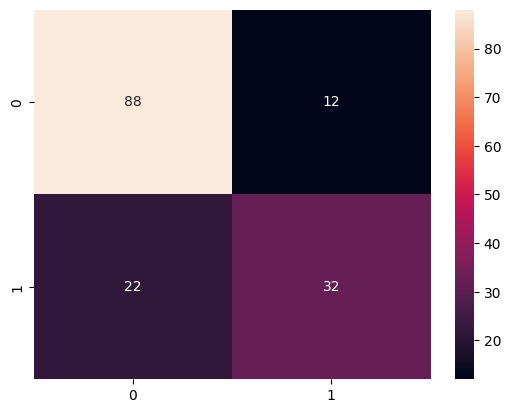

In [20]:
# Heatmap of Confusion matrix
sns.(pd.DataFrame(cm), annot=True)

*Predictive System*

In [21]:
user_data = []
print("Enter the Details to predict you are Diabetic or not")
Pregnancies = input("Enter the number of pregnancies:")
user_data.append(Pregnancies)
Glucose = input("Enter the Glucose Level:")
user_data.append(Glucose)
Blood_Pressure = input("Enter the your Blood Pressure:")
user_data.append(Blood_Pressure)
Skin_Thickness = input("Enter the your Skin Thickness:")
user_data.append(Skin_Thickness)
Insulin = input("Enter your Insulin:")
user_data.append(Insulin)
BMI = input("Enter your BMI:")
user_data.append(BMI)
Diabetes_Pedigree_function = input("Enter the Diabetes Pedigree Function:")
user_data.append(Diabetes_Pedigree_function)
Age = input("Enter your age:")
user_data.append(Age)


user_data = np.array(user_data)

reshaped_data = user_data.reshape(1, -1)
print(reshaped_data)

std_data = sc.fit_transform(reshaped_data)

std_data = pd.DataFrame(std_data)

prediction = knn_model.predict(std_data.iloc[:, [1, 4, 5, 7]].values)
# acc = accuracy_score(prediction, Y_test)

if prediction == 0:
    print("You are Not Diabetic")
else:
    print("You are Diabetic")

Enter the Details to predict you are Diabetic or not
[['5' '139' '89' '0' '0' '32' '0.185' '35']]
You are Not Diabetic
